<a href="https://colab.research.google.com/github/nikeshgamal24/Customer-Claim-Value-Forecasting-Project/blob/main/Customer_Claim_Value_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import necessary libraries

In [2]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Data Cleaning

In [3]:
## Data Collection
data  = pd.read_csv('CLTV_data.csv')

In [4]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
data.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver
59594,148987,Female,Urban,Bachelor,5L-10L,1,4,5939,More than 1,B,Platinum


### Missing Values

In [6]:
## missing balues
data.isnull().sum()

,0
id,0
gender,0
area,0
qualification,0
income,0
marital_status,0
vintage,0
claim_amount,0
num_policies,0
policy,0


In [7]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [8]:
data.drop(['id'],axis = 1,inplace=True)

In [9]:
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [10]:
data.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy'],
      dtype='object')

In [11]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
## check for the unique values
for column in data.columns:
  print(f"Column Name: {column}")
  print(f"Unique Values: {data[column].unique()}")
  print('---------------------------')

Column Name: gender
Unique Values: ['Female' 'Male']
---------------------------
Column Name: area
Unique Values: ['Rural' 'Urban']
---------------------------
Column Name: qualification
Unique Values: ['High School' 'Bachelor' 'Others']
---------------------------
Column Name: income
Unique Values: ['5L-10L' '2L-5L' 'More than 10L' '<=2L']
---------------------------
Column Name: marital_status
Unique Values: [0 1]
---------------------------
Column Name: vintage
Unique Values: [6 4 7 2 5 3 8 1 0]
---------------------------
Column Name: claim_amount
Unique Values: [ 2134  4102  2925 ... 17238  7829 14603]
---------------------------
Column Name: num_policies
Unique Values: ['More than 1' '1']
---------------------------
Column Name: policy
Unique Values: ['B' 'A' 'C']
---------------------------
Column Name: type_of_policy
Unique Values: ['Silver' 'Platinum' 'Gold']
---------------------------


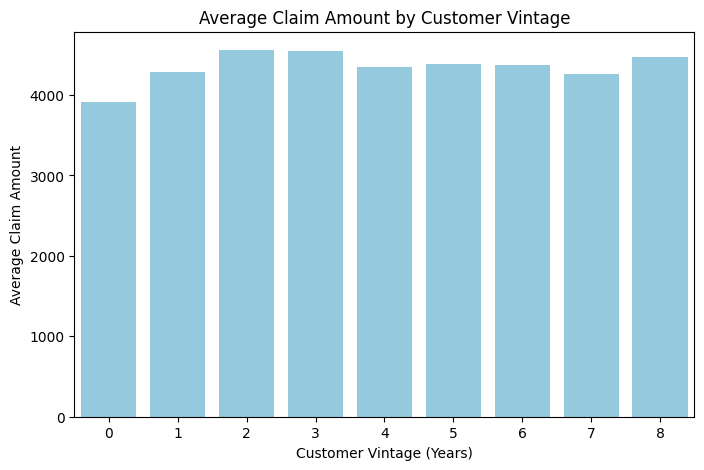

In [13]:
### For vintage columns
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average claim_amount per vintage
avg_claim_by_vintage = data.groupby('vintage')['claim_amount'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='vintage', y='claim_amount', data=avg_claim_by_vintage, color='skyblue')
plt.title('Average Claim Amount by Customer Vintage')
plt.xlabel('Customer Vintage (Years)')
plt.ylabel('Average Claim Amount')
plt.show()


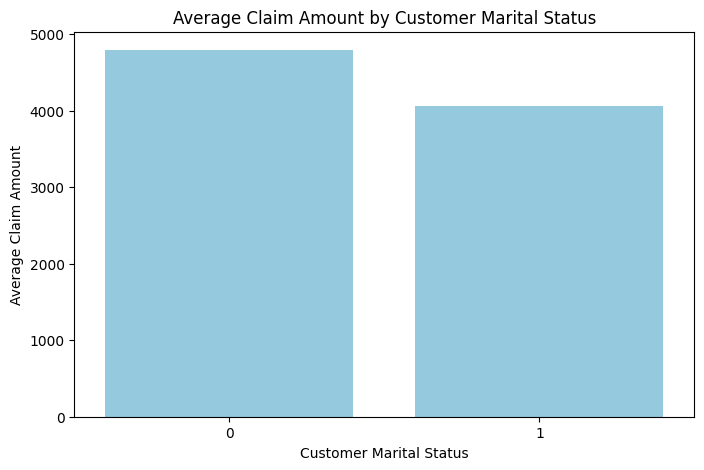

In [14]:
### For marital column
# Calculate average claim_amount per marial status
avg_claim_by_marital_status = data.groupby('marital_status')['claim_amount'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='marital_status', y='claim_amount', data=avg_claim_by_marital_status, color='skyblue')
plt.title('Average Claim Amount by Customer Marital Status')
plt.xlabel('Customer Marital Status')
plt.ylabel('Average Claim Amount')
plt.show()


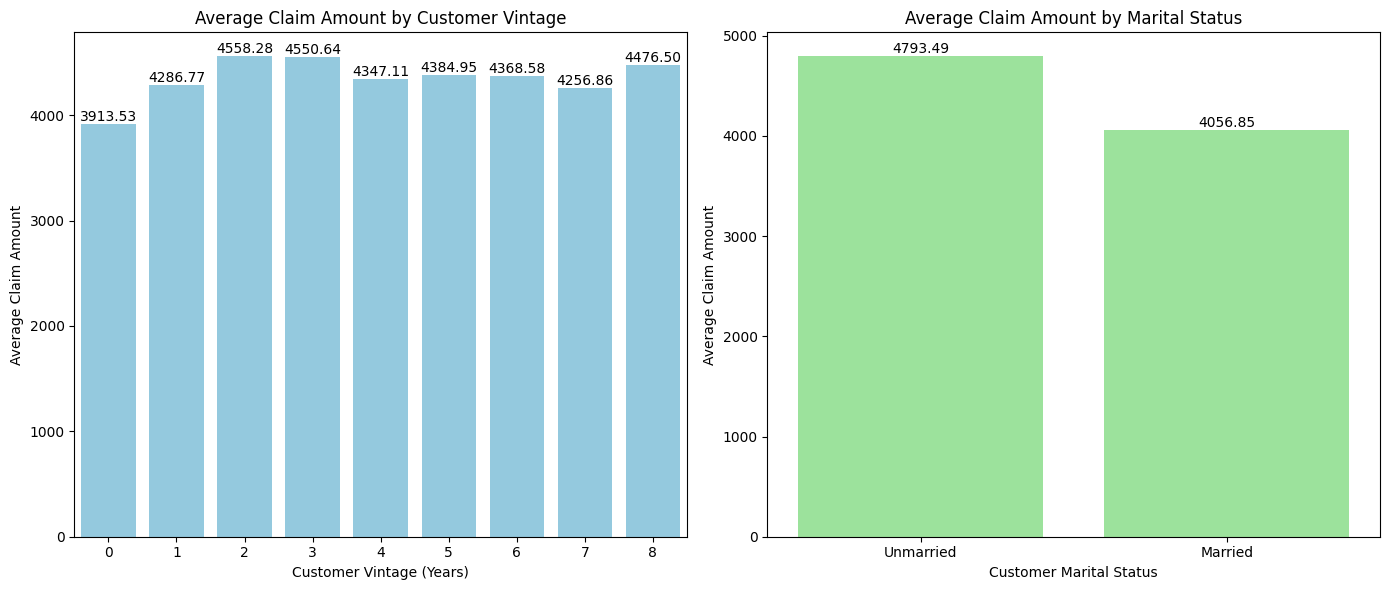

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate averages
avg_claim_by_vintage = data.groupby('vintage')['claim_amount'].mean().reset_index()
avg_claim_by_marital_status = data.groupby('marital_status')['claim_amount'].mean().reset_index()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Barplot for vintage
sns.barplot(ax=axes[0], x='vintage', y='claim_amount', data=avg_claim_by_vintage, color='skyblue')
axes[0].set_title('Average Claim Amount by Customer Vintage')
axes[0].set_xlabel('Customer Vintage (Years)')
axes[0].set_ylabel('Average Claim Amount')
# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')

# Barplot for marital status
sns.barplot(ax=axes[1], x='marital_status', y='claim_amount', data=avg_claim_by_marital_status, color='lightgreen')
axes[1].set_title('Average Claim Amount by Marital Status')
axes[1].set_xlabel('Customer Marital Status')
axes[1].set_ylabel('Average Claim Amount')

# Replace marital_status numeric ticks with labels
marital_labels = {0: 'Unmarried', 1: 'Married'}
axes[1].set_xticklabels([marital_labels.get(tick, tick) for tick in avg_claim_by_marital_status['marital_status']])
# Add value labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [16]:
## check for the unique values
for column in data.columns:
  print(f"Column Name: {column}")
  print(f"Unique Values: {data[column].unique()}")
  print('---------------------------')

Column Name: gender
Unique Values: ['Female' 'Male']
---------------------------
Column Name: area
Unique Values: ['Rural' 'Urban']
---------------------------
Column Name: qualification
Unique Values: ['High School' 'Bachelor' 'Others']
---------------------------
Column Name: income
Unique Values: ['5L-10L' '2L-5L' 'More than 10L' '<=2L']
---------------------------
Column Name: marital_status
Unique Values: [0 1]
---------------------------
Column Name: vintage
Unique Values: [6 4 7 2 5 3 8 1 0]
---------------------------
Column Name: claim_amount
Unique Values: [ 2134  4102  2925 ... 17238  7829 14603]
---------------------------
Column Name: num_policies
Unique Values: ['More than 1' '1']
---------------------------
Column Name: policy
Unique Values: ['B' 'A' 'C']
---------------------------
Column Name: type_of_policy
Unique Values: ['Silver' 'Platinum' 'Gold']
---------------------------


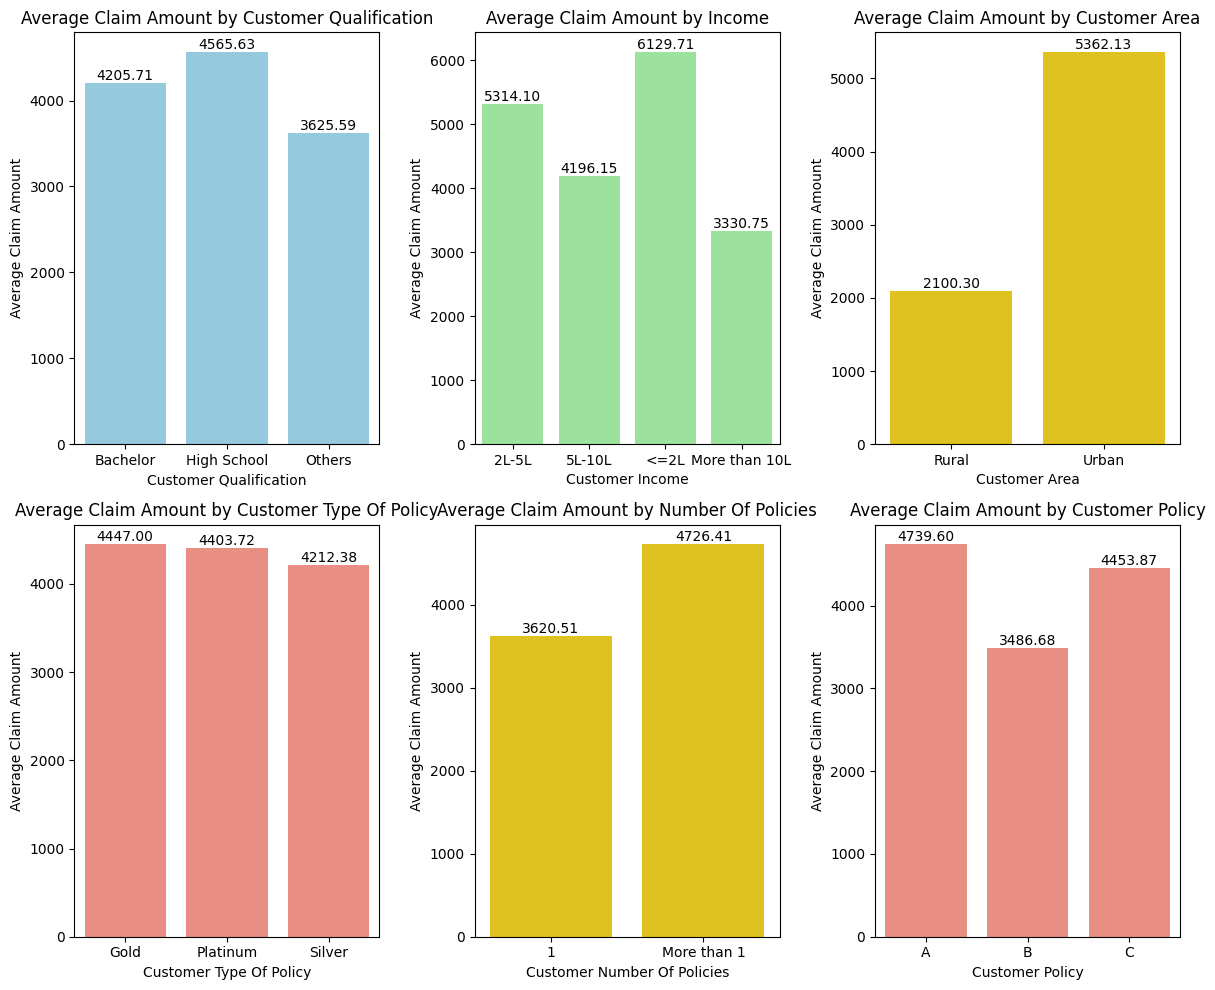

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate averages
avg_claim_by_qualification = data.groupby('qualification')['claim_amount'].mean().reset_index()
avg_claim_by_income = data.groupby('income')['claim_amount'].mean().reset_index()
avg_claim_by_type_of_policy = data.groupby('type_of_policy')['claim_amount'].mean().reset_index()
avg_claim_by_num_policies = data.groupby('num_policies')['claim_amount'].mean().reset_index()
avg_claim_by_policy = data.groupby('policy')['claim_amount'].mean().reset_index()
avg_claim_by_area = data.groupby('area')['claim_amount'].mean().reset_index()

# Create subplots: 2 row, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12,10))

# Barplot for qualification
sns.barplot(ax=axes[0,0], x='qualification', y='claim_amount', data=avg_claim_by_qualification, color='skyblue')
axes[0,0].set_title('Average Claim Amount by Customer Qualification')
axes[0,0].set_xlabel('Customer Qualification')
axes[0,0].set_ylabel('Average Claim Amount')
# Add value labels on bars
for container in axes[0,0].containers:
    axes[0,0].bar_label(container, fmt='%.2f')

# Barplot for income
sns.barplot(ax=axes[0, 1], x='income', y='claim_amount', data=avg_claim_by_income, color='lightgreen')
axes[0, 1].set_title('Average Claim Amount by Income')
axes[0, 1].set_xlabel('Customer Income')
axes[0, 1].set_ylabel('Average Claim Amount')
# Add value labels on bars
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.2f')


# Barplot for area
sns.barplot(ax=axes[0,2], x='area', y='claim_amount', data=avg_claim_by_area, color='gold')
axes[0, 2].set_title('Average Claim Amount by Customer Area')
axes[0, 2].set_xlabel('Customer Area')
axes[0, 2].set_ylabel('Average Claim Amount')
# Add value labels on bars
for container in axes[0, 2].containers:
    axes[0, 2].bar_label(container, fmt='%.2f')


# Barplot for type_of_policy
sns.barplot(ax=axes[1, 0], x='type_of_policy', y='claim_amount', data=avg_claim_by_type_of_policy, color='salmon')
axes[1, 0].set_title('Average Claim Amount by Customer Type Of Policy')
axes[1, 0].set_xlabel('Customer Type Of Policy')
axes[1, 0].set_ylabel('Average Claim Amount')
# Add value labels on bars
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.2f')


# Barplot for num_policies
sns.barplot(ax=axes[1, 1], x='num_policies', y='claim_amount', data=avg_claim_by_num_policies, color='gold')
axes[1, 1].set_title('Average Claim Amount by Number Of Policies')
axes[1, 1].set_xlabel('Customer Number Of Policies')
axes[1, 1].set_ylabel('Average Claim Amount')
# Add value labels on bars
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.2f')

# Barplot for policy
sns.barplot(ax=axes[1, 2], x='policy', y='claim_amount', data=avg_claim_by_policy, color='salmon')
axes[1, 2].set_title('Average Claim Amount by Customer Policy')
axes[1, 2].set_xlabel('Customer Policy')
axes[1, 2].set_ylabel('Average Claim Amount')
# Add value labels on bars
for container in axes[1, 2].containers:
    axes[1, 2].bar_label(container, fmt='%.2f')

plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [18]:
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [19]:
## histogram plot for checking the distribution of numerical columns
numerical_columns = [feature for feature in data.columns if data[feature].dtype!='O'and feature != 'claim_amount']
numerical_columns

['marital_status', 'vintage']

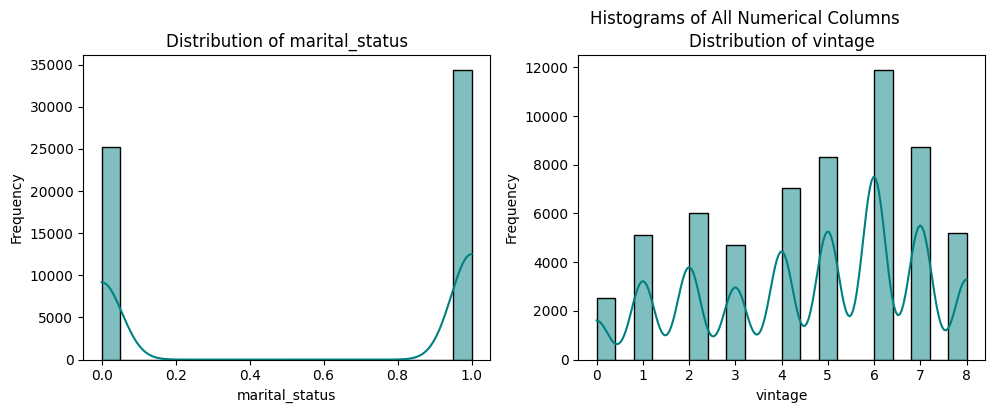

In [20]:
# Determine the number of rows and columns for the subplots grid
n_numerical_cols = len(numerical_columns)
n_cols_per_row = 3 # You can adjust this number
n_rows = (n_numerical_cols + n_cols_per_row - 1) // n_cols_per_row # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(n_cols_per_row * 5, n_rows * 4))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Loop through each numerical column and create a histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(ax=axes[i], x=col, data=data, bins=20, kde=True, color='teal')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if the total number of plots is not a perfect multiple of n_cols_per_row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust spacing to prevent overlap
plt.suptitle('Histograms of All Numerical Columns', y=1.02, fontsize=12) # Add a main title
plt.show()

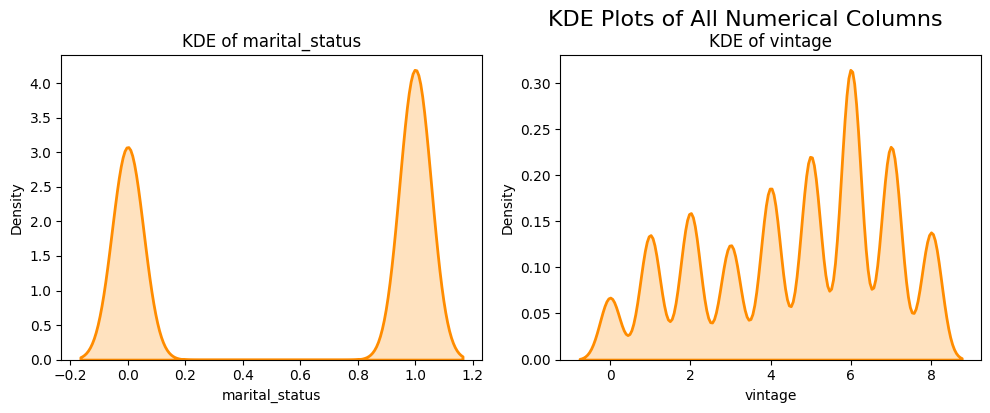

In [21]:
# Determine the number of rows and columns for the subplots grid
n_numerical_cols = len(numerical_columns)
n_cols_per_row = 3 # You can adjust this number
n_rows = (n_numerical_cols + n_cols_per_row - 1) // n_cols_per_row # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(n_cols_per_row * 5, n_rows * 4))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Loop through each numerical column and create a KDE plot
for i, col in enumerate(numerical_columns):
    sns.kdeplot(ax=axes[i], x=col, data=data, fill=True, color='darkorange', linewidth=2)
    axes[i].set_title(f'KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust spacing to prevent overlap
plt.suptitle('KDE Plots of All Numerical Columns', y=1.02, fontsize=16) # Add a main title
plt.show()

### Duplicate values

In [22]:
data[data.duplicated()]

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
337,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold
486,Male,Rural,High School,5L-10L,1,0,0,1,A,Platinum
493,Male,Rural,High School,5L-10L,1,4,0,More than 1,A,Platinum
682,Male,Rural,High School,5L-10L,1,8,0,1,B,Platinum
726,Female,Rural,Bachelor,5L-10L,1,4,0,More than 1,A,Silver
...,...,...,...,...,...,...,...,...,...,...
59574,Male,Rural,Bachelor,5L-10L,1,0,0,More than 1,A,Platinum
59583,Male,Rural,Bachelor,5L-10L,0,2,0,1,B,Silver
59588,Female,Rural,High School,5L-10L,1,6,0,More than 1,B,Platinum
59590,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver


In [23]:
data[
    (data['gender'] == 'Female') &
    (data['area'] == 'Rural') &
    (data['qualification'] == 'High School') &
    (data['income'] == '5L-10L') &
    (data['num_policies'] == 'More than 1') &
    (data['policy'] == 'B') &
    (data['type_of_policy'] == 'Gold') &
    (data['claim_amount'] == 0) &
    (data['vintage'] == 7) &
    (data['marital_status'] ==0)
]


,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
4661,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
6803,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
18564,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
25408,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
35453,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
35587,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
41728,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
44546,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
44572,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold
47564,Female,Rural,High School,5L-10L,0,7,0,More than 1,B,Gold


In [24]:
data[data.duplicated()]

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
337,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold
486,Male,Rural,High School,5L-10L,1,0,0,1,A,Platinum
493,Male,Rural,High School,5L-10L,1,4,0,More than 1,A,Platinum
682,Male,Rural,High School,5L-10L,1,8,0,1,B,Platinum
726,Female,Rural,Bachelor,5L-10L,1,4,0,More than 1,A,Silver
...,...,...,...,...,...,...,...,...,...,...
59574,Male,Rural,Bachelor,5L-10L,1,0,0,More than 1,A,Platinum
59583,Male,Rural,Bachelor,5L-10L,0,2,0,1,B,Silver
59588,Female,Rural,High School,5L-10L,1,6,0,More than 1,B,Platinum
59590,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver


In [25]:
data.shape

(59595, 10)

In [26]:
## duplicated data dropped
data.drop_duplicates(keep='first',inplace = True)

In [27]:
data.shape

(52033, 10)

In [28]:
data[data.duplicated()]

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy


### Check Data Types

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52033 entries, 0 to 59594
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          52033 non-null  object
 1   area            52033 non-null  object
 2   qualification   52033 non-null  object
 3   income          52033 non-null  object
 4   marital_status  52033 non-null  int64 
 5   vintage         52033 non-null  int64 
 6   claim_amount    52033 non-null  int64 
 7   num_policies    52033 non-null  object
 8   policy          52033 non-null  object
 9   type_of_policy  52033 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.4+ MB


In [30]:
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [31]:
## categorical data
categorical_colunns= [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_colunns

['gender',
 'area',
 'qualification',
 'income',
 'num_policies',
 'policy',
 'type_of_policy']

In [32]:
## numerical data
numerical_columns = [feature for feature in data.columns if data[feature].dtype !='O' and feature != 'claim_amount']
numerical_columns

['marital_status', 'vintage']

In [ ]:
for col in numerical_columns:
  print(f'Columns Name: {col}')
  print(f'Unique Values Count: {len(data[col].unique())}')
  print('--------------------------------')

Columns Name: marital_status
Unique Values Count: 2
--------------------------------
Columns Name: vintage
Unique Values Count: 9
--------------------------------


In [33]:
## discrete columns/features
discrete_columns = [feature for feature in numerical_columns if len(data[feature].unique())<25]
discrete_columns

['marital_status', 'vintage']

In [35]:
## continuous columns/features
continuous_columns = [feature for feature in numerical_columns if feature not in discrete_columns]
continuous_columns

[]

In [36]:
data['claim_amount'].describe()

,claim_amount
count,52033.000000
mean,4993.781081
std,3040.681923
min,0.000000
25%,3214.000000
50%,4533.000000
75%,6314.000000
max,32534.000000


In [37]:
data[data['claim_amount'] == 0]

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
6,Male,Urban,Bachelor,5L-10L,0,6,0,1,A,Platinum
7,Female,Urban,High School,2L-5L,0,2,0,More than 1,B,Gold
8,Male,Rural,Bachelor,5L-10L,0,4,0,1,A,Silver
25,Female,Rural,Bachelor,5L-10L,1,4,0,More than 1,A,Silver
...,...,...,...,...,...,...,...,...,...,...
59332,Female,Rural,High School,More than 10L,0,4,0,More than 1,B,Gold
59346,Male,Rural,High School,2L-5L,1,5,0,More than 1,C,Gold
59348,Female,Urban,Bachelor,More than 10L,0,7,0,1,B,Platinum
59554,Male,Rural,Bachelor,More than 10L,1,2,0,1,A,Silver


In [38]:
print("Original 'claim_amount' statistics (including zeros):")
print(data['claim_amount'].describe())
print(f"Count of 0s: {len(data[data['claim_amount'] == 0])}")
print("-" * 30)

# 1. Calculate the median of non-zero claim amounts
# Use .loc to select rows where 'claim_amount' is NOT 0
median_non_zero_claim = data.loc[data['claim_amount'] != 0, 'claim_amount'].median()

print(f"Median of non-zero 'claim_amount' values: {median_non_zero_claim:.2f}")
print("-" * 30)

# 2. Replace the 0 values in 'claim_amount' with this median
# We use .loc to ensure we modify the original DataFrame safely
data.loc[data['claim_amount'] == 0, 'claim_amount'] = median_non_zero_claim

print("\n'claim_amount' statistics AFTER replacing 0s with median of non-zero claims:")
print(data['claim_amount'].describe())
print(f"Count of 0s after replacement: {len(data[data['claim_amount'] == 0])}") # Should be 0

Original 'claim_amount' statistics (including zeros):
count    52033.000000
mean      4993.781081
std       3040.681923
min          0.000000
25%       3214.000000
50%       4533.000000
75%       6314.000000
max      32534.000000
Name: claim_amount, dtype: float64
Count of 0s: 4340
------------------------------
Median of non-zero 'claim_amount' values: 5026.00
------------------------------

'claim_amount' statistics AFTER replacing 0s with median of non-zero claims:
count    52033.000000
mean      5412.992735
std       2643.864617
min       2000.000000
25%       3738.000000
50%       5026.000000
75%       6314.000000
max      32534.000000
Name: claim_amount, dtype: float64
Count of 0s after replacement: 0


In [39]:
data[data['claim_amount'] == 0]

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy


## Independent Feature and Dependent Feature

In [40]:
### Dependent Features
X = data.drop(["claim_amount"],axis=1)

In [41]:
X.head(10)

,gender,area,qualification,income,marital_status,vintage,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,More than 1,B,Silver
5,Female,Rural,High School,2L-5L,1,6,More than 1,A,Gold
6,Male,Urban,Bachelor,5L-10L,0,6,1,A,Platinum
7,Female,Urban,High School,2L-5L,0,2,More than 1,B,Gold
8,Male,Rural,Bachelor,5L-10L,0,4,1,A,Silver
9,Male,Urban,High School,2L-5L,0,6,More than 1,C,Gold


In [42]:
### Independent Feature
y = data["claim_amount"]
y

,claim_amount
0,2134
1,4102
2,2925
3,5026
4,14059
...,...
59587,6302
59589,6587
59592,3323
59593,2886


## Train Test Split

In [43]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
y_train.shape,y_test.shape

((41626,), (10407,))

In [ ]:
# --- APPLY LOG TRANSFORMATION HERE ---
#  Apply log transformation to y_train and y_test  --> because the claim_amount contains 19% 0 values
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

In [44]:
## Create Column Transformer with 3 types of transformer i.e. StandardScaler() , OneHotEncoder(), ColumnTransformer()
### numerical feature from independent features
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns


In [45]:
num_features

Index(['marital_status', 'vintage'], dtype='object')

In [46]:
cat_features

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

## Encoding Data

In [47]:
X.head()

,gender,area,qualification,income,marital_status,vintage,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,More than 1,B,Silver


In [70]:
sorted(X['vintage'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [64]:
# --- Define your feature lists for ColumnTransformer (as determined previously) ---
nominal_features = [
    'gender', 'area', 'policy', 'marital_status'
]
ordinal_features = [
    'num_policies', 'type_of_policy', 'income', 'vintage','qualification'
]
numerical_features = [] # Assuming no other truly continuous numerical features in X

In [71]:
ordinal_categories_mapping = {
    'num_policies': ['0', '1', 'More than 1'],
    'type_of_policy': ['Silver', 'Platinum', 'Gold'],
    'income': ['5L-10L', '2L-5L', 'More than 10L', '<=2L'],
    'qualification':['High School', 'Bachelor', 'Others'],
    'vintage': sorted(X['vintage'].unique().tolist())
}

ordinal_encoder_categories = [ordinal_categories_mapping[col] for col in ordinal_features]

In [72]:
cat_features

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

In [73]:
nominal_features

['gender', 'area', 'qualification', 'policy', 'marital_status']

In [74]:
ordinal_features

['num_policies', 'type_of_policy', 'income', 'vintage']

In [75]:
ordinal_encoder_categories

[['0', '1', 'More than 1'],
 ['Silver', 'Platinum', 'Gold'],
 ['5L-10L', '2L-5L', 'More than 10L', '<=2L'],
 [0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [76]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [77]:
cat_features

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

In [78]:
data['type_of_policy'].unique()

array(['Silver', 'Platinum', 'Gold'], dtype=object)

In [79]:
# --- Initialize Transformers and ColumnTransformer ---
oh_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder(categories=ordinal_encoder_categories, handle_unknown='use_encoded_value', unknown_value=-1)
std_scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', oh_encoder, nominal_features),
        ('ordinal', ordinal_encoder, ordinal_features),
        ('scaler', std_scaler, numerical_features)
    ],
    remainder='drop'
)

In [80]:
preprocessor

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['gender', 'area', 'qualification', 'policy',
                                  'marital_status']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['0', '1',
                                                             'More than 1'],
                                                            ['Silver',
                                                             'Platinum',
                                                             'Gold'],
                                                            ['5L-10L', '2L-5L',
                                                             'More than 10L',
                                                             '<=2L'],
                                                            [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8]],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['num_policies', 'type_of_policy', 'income',
                                  'vintage']),
                                ('scaler', StandardScaler(), [])])

In [81]:
# --- Fit and Transform X_train, Transform X_test ---
X_train_transformed_array = preprocessor.fit_transform(X_train)
X_test_transformed_array = preprocessor.transform(X_test)

# --- Convert transformed X arrays to DataFrames (with correct column names and index) ---
ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(nominal_features)
ordinal_transformed_names = ordinal_features
numerical_transformed_names = numerical_features

all_transformed_feature_names = list(ohe_feature_names) + ordinal_transformed_names + numerical_transformed_names

X_train_transformed_df = pd.DataFrame(X_train_transformed_array,
                                      columns=all_transformed_feature_names,
                                      index=X_train.index)

X_test_transformed_df = pd.DataFrame(X_test_transformed_array,
                                     columns=all_transformed_feature_names,
                                     index=X_test.index)


In [82]:
temp_df=pd.DataFrame(X_train_transformed_df)

In [83]:
temp_df.corr()

,gender_Male,area_Urban,qualification_High School,qualification_Others,policy_B,policy_C,marital_status_1,num_policies,type_of_policy,income,vintage
gender_Male,1.000000,0.036620,-0.027593,0.003282,0.013530,0.012862,0.075827,-0.046763,0.009537,-0.040623,0.010429
area_Urban,0.036620,1.000000,0.050612,-0.059677,-0.153404,-0.017810,-0.036736,0.093135,0.017696,0.004494,0.006081
qualification_High School,-0.027593,0.050612,1.000000,-0.221837,-0.087992,0.026598,-0.015243,0.004862,0.038417,-0.019323,-0.031889
qualification_Others,0.003282,-0.059677,-0.221837,1.000000,0.025004,0.018405,0.011871,-0.079347,-0.013530,-0.007050,-0.002110
policy_B,0.013530,-0.153404,-0.087992,0.025004,1.000000,-0.189968,-0.047136,0.011563,-0.107374,0.063294,0.072490
policy_C,0.012862,-0.017810,0.026598,0.018405,-0.189968,1.000000,0.029167,-0.023622,0.000362,0.000251,-0.012829
marital_status_1,0.075827,-0.036736,-0.015243,0.011871,-0.047136,0.029167,1.000000,-0.072853,0.005966,-0.030293,-0.001718
num_policies,-0.046763,0.093135,0.004862,-0.079347,0.011563,-0.023622,-0.072853,1.000000,0.022007,0.032189,0.066470
type_of_policy,0.009537,0.017696,0.038417,-0.013530,-0.107374,0.000362,0.005966,0.022007,1.000000,-0.032951,-0.003320
income,-0.040623,0.004494,-0.019323,-0.007050,0.063294,0.000251,-0.030293,0.032189,-0.032951,1.000000,0.000787


<Axes: >

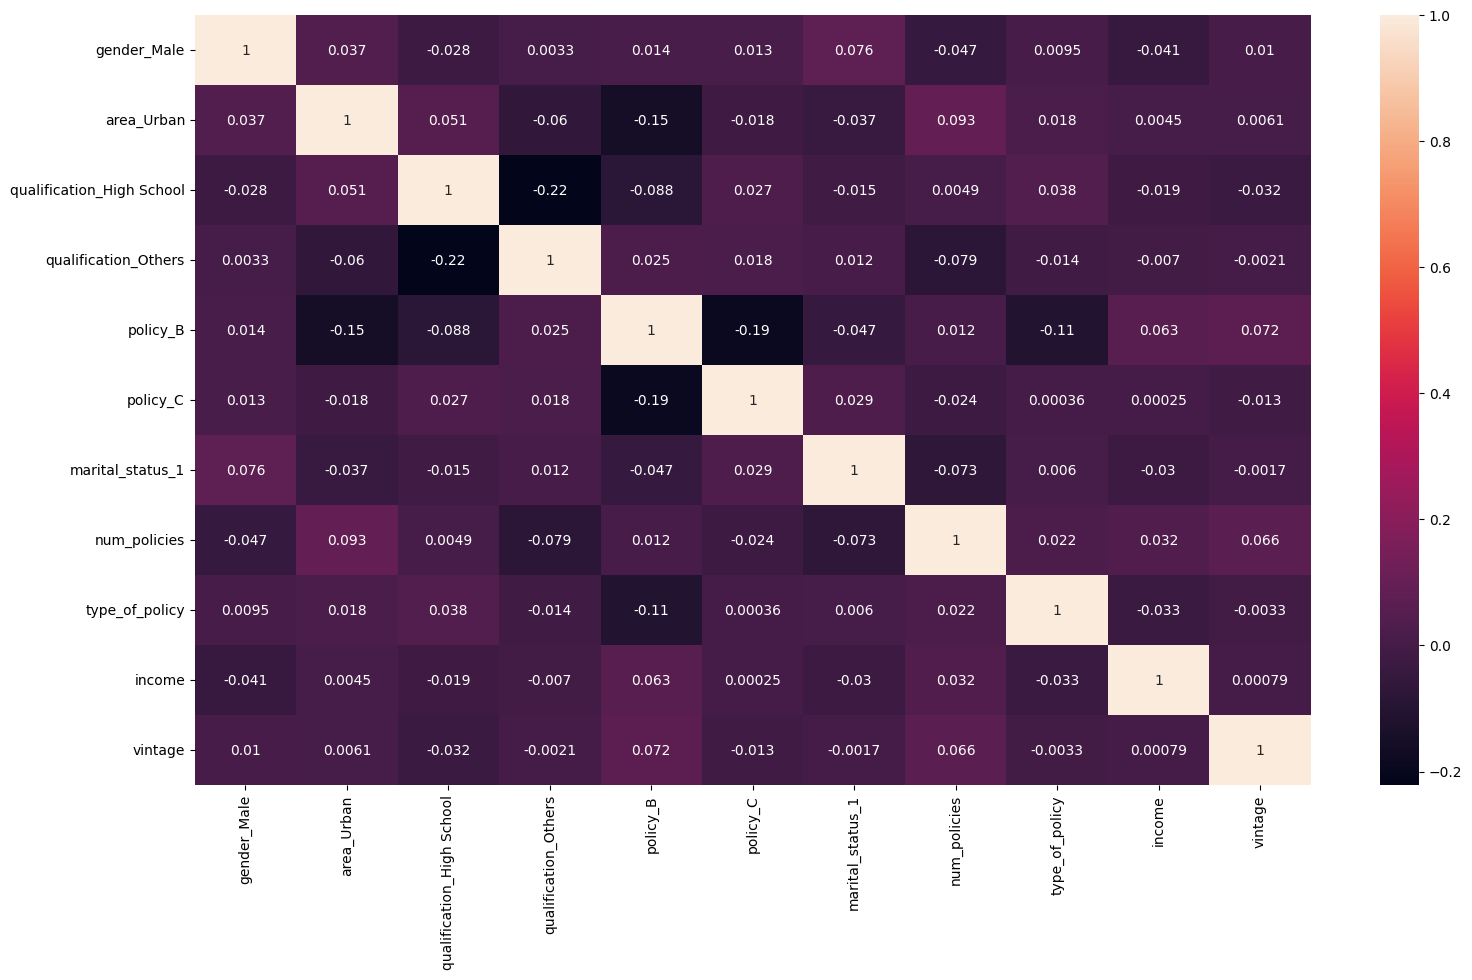

In [84]:

plt.figure(figsize=(18,10))
sns.heatmap(temp_df.corr(),annot=True)

## Model Training
### Model Evaluation

In [85]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,recall_score,precision_score


In [86]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [63]:
## create dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "Kneighbor Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed_df,y_train_transformed) ## model training

    ## Make Predictions
    ### Prediction will be on log scale
    y_train_pred_log = model.predict(X_train_transformed_df)
    y_test_pred_log = model.predict(X_test_transformed_df)

    # --- Inverse Transform Predictions for Evaluation ---
    y_train_pred_original_scale = np.expm1(y_train_pred_log)
    y_test_pred_original_scale = np.expm1(y_test_pred_log)

    # Ensure no negative predictions if expm1 yields very small negative numbers
    y_train_pred_original_scale[y_train_pred_original_scale < 0] = 0
    y_test_pred_original_scale[y_test_pred_original_scale < 0] = 0

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2= evaluate_model(y_train,y_train_pred_original_scale)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2= evaluate_model(y_test,y_test_pred_original_scale)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2531.4941
- Mean Absolute Error: 1762.9586
- R2 Score: 0.0897
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2483.0653
- Mean Absolute Error: 1731.0987
- R2 Score: 0.0919


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 2531.4941
- Mean Absolute Error: 1762.9544
- R2 Score: 0.0897
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2483.0653
- Mean Absolute Error: 1731.0947
- R2 Score: 0.0919


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 2531.5123
- Mean Absolute Error: 1762.6870
- R2 Score: 0.0897
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2483.0731
- Mean Absolute Error: 1730.8329
- R2 Score: 0.0919


Kneighbor Regressor
Model performance for Training set
- Root Mean Squared Error: 2529.4685
- Mean Absolu